# Song Lyrics Classifier: The Beatles vs The Rolling Stones

In [1]:
import pandas as pd
import re
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.text import FreqDistVisualizer
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
np.random.seed(42)

In [3]:
#The Rolling Stones lyrics was scraped by album. We bring them one by one and then merge them together.
df = pd.read_csv('./Rolling Stones_lyrics_12_by_5.csv')

In [4]:
RS_1=df

In [5]:
RS_1.head()

,song_title,lyrics
0,\r\nAround and Around Lyrics,[Chorus]\r\nI said the joint was rocking\r\nUh...
1,\r\nConfessin' The Blues Lyrics,"[Verse 1]\r\nBaby, here I stand before you\r\n..."
2,\r\nEmpty Heart Lyrics,[Verse 1]\r\nAn empty heart is like an empty l...
3,\r\nTime Is on My Side Lyrics,"[Verse 1]\r\nTime is on my side, yes it is\r\n..."
4,"\r\nGood Times, Bad Times Lyrics",There've been good times\r\nThere've been bad ...


In [6]:
RS_2 = pd.read_csv('./Rolling Stones_lyrics_Around_and_Around.csv')


In [7]:
RS_2.head()

,song_title,lyrics
0,\r\nAround and Around Lyrics,[Chorus]\r\nI said the joint was rocking\r\nUh...
1,"\r\nGood Times, Bad Times Lyrics",There've been good times\r\nThere've been bad ...
2,\r\nIt's All Over Now Lyrics,"[Verse 1]\r\nWell, baby used to stay out all n..."
3,\r\nEmpty Heart Lyrics,[Verse 1]\r\nAn empty heart is like an empty l...
4,\r\nConfessin' The Blues Lyrics,"[Verse 1]\r\nBaby, here I stand before you\r\n..."


In [8]:
RS_3 = pd.read_csv('./Rolling Stones_lyrics_Beggars_Banquet.csv')

In [9]:
RS_3.head()

,song_title,lyrics
0,\r\nSympathy for the Devil Lyrics,[Verse 1]\r\nPlease allow me to introduce myse...
1,\r\nNo Expectations Lyrics,[Verse 1]\r\nTake me to the station\r\nAnd put...
2,\r\nDear Doctor Lyrics,"[Chorus]\r\nOh help me, please doctor, I'm dam..."
3,\r\nParachute Woman Lyrics,"[Chorus]\r\nParachute woman, land on me tonigh..."
4,\r\nJig-Saw Puzzle Lyrics,[Verse 1]\r\nThere's a tramp sitting on my doo...


In [10]:
RS_4 = pd.read_csv('./Rolling Stones_lyrics_Between_the_buttons.csv')

In [11]:
RS_4.head()

,song_title,lyrics
0,\r\nLet's Spend the Night Together Lyrics,[Intro]\r\nMy-My-My-My\r\n\r\n[Verse 1]\r\nDon...
1,\r\nYesterday's Papers Lyrics,[Chorus]\r\nWho wants yesterday's papers?\r\nW...
2,\r\nRuby Tuesday Lyrics,[Verse 1]\r\nShe would never say where she cam...
3,\r\nConnection Lyrics,[Chorus]\r\nAll I want to do is to get back to...
4,\r\nShe Smiled Sweetly Lyrics,[Verse 1]\r\nWhy do my thoughts loom so large ...


In [12]:
RS_5 = pd.read_csv('./Rolling Stones_lyrics_Englands_Newest_Hitmakers.csv')

In [13]:
RS_5.head()

,song_title,lyrics
0,\r\nNot Fade Away Lyrics,[Chorus]\r\nI'm going to tell you how it's goi...
1,\r\nRoute 66 Lyrics,[Intro]\r\nWell if you ever plan to motor west...
2,\r\nI Just Want To Make Love To You Lyrics,[Verse 1-Mick Jagger]\r\nI don't want you be ...
3,\r\nHonest I Do Lyrics,[Verse 1]\r\nDo you know that I love you\r\nHo...
4,\r\nLittle By Little Lyrics,"[Verse 1]\r\nTried to trail you last night, ba..."


In [14]:
RS_6 = pd.read_csv('./Rolling Stones_lyrics_Flowers_3.csv')

In [15]:
RS_6.head()

,song_title,lyrics
0,\r\nRuby Tuesday Lyrics,[Verse 1]\r\nShe would never say where she cam...
1,"\r\nHave You Seen Your Mother, Baby, Standing ...","[Chorus]\r\nHave you seen your mother, baby, s..."
2,\r\nLet's Spend the Night Together Lyrics,[Intro]\r\nMy-My-My-My\r\n\r\n[Verse 1]\r\nDon...
3,\r\nLady Jane Lyrics,"[Verse 1]\r\nMy sweet Lady Jane, when I see yo..."
4,\r\nOut of Time Lyrics,[Verse 1]\r\nYou don't know what's going on\r\...


In [16]:
RS_7 = pd.read_csv('./Rolling Stones_lyrics_Got_Live_If_You_Want_It.csv')

In [17]:
RS_7.head()

,song_title,lyrics
0,\r\nWe Want The Stones Lyrics,We want The Stones\r\nWe want The Stones\r\nWe...
1,\r\n19th Nervous Breakdown Lyrics,[Verse 1]\r\nYou're the kind of person\r\nYou ...
2,\r\n(I Can't Get No) Satisfaction Lyrics,[Instrumental Intro]\r\n\r\n[Chorus]\r\nI can'...
3,\r\nFortune teller Lyrics,[Verse 1]\r\nWent to the fortune teller\r\nHad...
4,\r\nI've Been Loving You Too Long Lyrics,[Verse 1]\r\nI've been loving you too long to ...


In [18]:
RS_8 = pd.read_csv('./Rolling Stones_lyrics_Let_It_Bleed.csv')

In [19]:
RS_8.head()

,song_title,lyrics
0,\r\nGimme Shelter Lyrics,[Intro: Merry Clayton]\r\nOooooh\r\n\r\n[Verse...
1,\r\nLove In Vain Lyrics,[Verse 1]\r\nWell I followed her to the statio...
2,\r\nCountry Honk Lyrics,"[Verse 1]\r\nI'm sittin' in a bar, tippin' a j..."
3,\r\nLive With Me Lyrics,[Verse 1]\r\nI got nasty habits\r\nI take tea ...
4,\r\nLet It Bleed Lyrics,"[Chorus]\r\nWell, we all need someone we can l..."


In [20]:
RS_9 = pd.read_csv('./Rolling Stones_lyrics_Out_of_Our_Heads.csv')

In [21]:
RS_9.head()

,song_title,lyrics
0,\r\nMercy Mercy Lyrics,"[Verse 1]\r\nHave mercy, have mercy, baby\r\nH..."
1,\r\nHitch Hike Lyrics,[Verse 1]\r\nI'm going to Chicago that's the l...
2,\r\nThe Last Time Lyrics,[Verse 1]\r\nWell I told you once and I told y...
3,\r\nThat's How Strong My Love Is Lyrics,[Verse 1]\r\nIf I was the sun way up there\r\n...
4,\r\nGood Times Lyrics,Whoa la la ta ta\r\nWhoa la la ta ta\r\nLa la ...


In [22]:
RS_10 = pd.read_csv('./Rolling Stones_lyrics_The_Rolling_Stones.csv')

In [23]:
RS_10.head()

,song_title,lyrics
0,\r\nRoute 66 Lyrics,[Intro]\r\nWell if you ever plan to motor west...
1,\r\nI Just Want To Make Love To You Lyrics,[Verse 1-Mick Jagger]\r\nI don't want you be ...
2,\r\nHonest I Do Lyrics,[Verse 1]\r\nDo you know that I love you\r\nHo...
3,\r\nMona (I Need You Baby) Lyrics,"[Intro]\r\nI say hey, Mona\r\nOh, Mona\r\nI sa..."
4,\r\nLittle By Little Lyrics,"[Verse 1]\r\nTried to trail you last night, ba..."


In [24]:
RS_11 = pd.read_csv('./Rolling Stones_lyrics_Aftermath.csv')

In [25]:
RS_11.head()

,song_title,lyrics
0,\r\nMother's Little Helper Lyrics,[Intro]\r\nWhat a drag it is getting old\r\n\r...
1,\r\nStupid Girl Lyrics,[Verse 1]\r\nI'm not talking about the kind of...
2,\r\nLady Jane Lyrics,"[Verse 1]\r\nMy sweet Lady Jane, when I see yo..."
3,\r\nUnder My Thumb Lyrics,[Verse 1]\r\nUnder my thumb the girl who once ...
4,\r\nDoncha Bother Me Lyrics,"[Chorus]\r\nI said, Oh no, don't you follow me..."


In [26]:
RS_12 = pd.read_csv('./Rolling Stones_lyrics_The_Rolling_Stones_no_2.csv')

In [27]:
RS_12.head()

,song_title,lyrics
0,\r\nEverybody Needs Somebody To Love Lyrics,[Verse 1]\r\nI'm so glad to be here tonight an...
1,\r\nDown Home Girl Lyrics,[Verse 1]\r\nLord I swear the perfume you wear...
2,\r\nYou Can't Catch Me Lyrics,[Verse 1]\r\nI bought a brand new air mobile\r...
3,\r\nTime Is on My Side Lyrics,"[Verse 1]\r\nTime is on my side, yes it is\r\n..."
4,\r\nWhat A Shame Lyrics,[Intro]\r\nWhat a shame\r\nNothing seems to be...


In [28]:
RS_13 = pd.read_csv('./Rolling Stones_lyrics_Their_Satanic_Majesties_Request.csv')

In [29]:
RS_13.head()

,song_title,lyrics
0,\r\nSing This All Together Lyrics,Why don't we sing this song all together\r\nOp...
1,\r\nCitadel Lyrics,[Verse 1]\r\nMen in arms shout who goes there\...
2,\r\nIn Another Land Lyrics,[Verse 1]\r\nIn another land where the breeze ...
3,\r\n2000 Man Lyrics,"[Verse 1]\r\nWell, my name is a number\r\nA pi..."
4,\r\nSing This All Together (See What Happens) ...,[Verse]\r\nWhy don't we sing this song all tog...


In [30]:
RS_14 = pd.read_csv('./Rolling Stones_lyrics_Decembers_Children_and_Everybodys.csv')

In [31]:
RS_14.head()

,song_title,lyrics
0,\r\nShe Said Yeah Lyrics,[Verse 1]\r\nDam deedle dee dam dam\r\nLittle ...
1,\r\nTalkin' About You Lyrics,[Chorus 1]\r\nLet me tell you about a girl I k...
2,\r\nYou Better Move On Lyrics,[Verse 1]\r\nYou ask me to give up the hand of...
3,\r\nLook What You've Done Lyrics,[Verse]\r\nNow look what you've done\r\nNow lo...
4,\r\nThe Singer Not The Song Lyrics,[Verse]\r\nEverywhere you want I always go\r\n...


In [32]:
RS_15 = pd.read_csv('./Rolling Stones_lyrics_Decembers_Get_Yer_Ya_Yas_Out.csv')

In [33]:
RS_15.head()

,song_title,lyrics
0,\r\nJumpin' Jack Flash Lyrics,(Instrumental Intro)\r\n\r\nOne two!\r\nI was ...
1,\r\nCarol Lyrics,"[Chorus]\r\nOh, Carol\r\nDo not let him steal ..."
2,\r\nStray Cat Blues Lyrics,"[Intro]\r\nAh... hey\r\nYeah, cat's own tail\r..."
3,\r\nLove In Vain Lyrics,[Verse 1]\r\nWell I followed her to the statio...
4,\r\nMidnight Rambler Lyrics,{​Intro}​\r\n\r\n[Verse 1]\r\nDid you hear abo...


In [34]:
#Let's merge together all featured Rolling Stones albums.
RS=RS_1.append([RS_2, RS_3, RS_4, RS_5, RS_6, RS_7, RS_8, RS_9, RS_10, RS_11, RS_12, RS_13, RS_14, RS_15], ignore_index=True)
RS.tail()

,song_title,lyrics
188,\r\nYou Gotta Move Lyrics,[Verse 1]\r\nYou got to move\r\nYou got to mov...
189,\r\nUnder My Thumb Lyrics,[Verse 1]\r\nUnder my thumb the girl who once ...
190,\r\nI'm Free Lyrics,[Verse 1]\r\nI'm free to do what I want any ol...
191,\r\n(I Can't Get No) Satisfaction Lyrics,[Instrumental Intro]\r\n\r\n[Chorus]\r\nI can'...
192,\r\nGet Yer Ya-Ya's Out! - The Rolling Stones ...,NaN


In [35]:
#we need to add Band column, which will be our target in this classifier problem.
RS['band']='Rolling_Stones'

In [36]:
RS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 3 columns):
song_title    193 non-null object
lyrics        188 non-null object
band          193 non-null object
dtypes: object(3)
memory usage: 4.6+ KB


In [37]:
RS.head(30)

,song_title,lyrics,band
0,\r\nAround and Around Lyrics,[Chorus]\r\nI said the joint was rocking\r\nUh...,Rolling_Stones
1,\r\nConfessin' The Blues Lyrics,"[Verse 1]\r\nBaby, here I stand before you\r\n...",Rolling_Stones
2,\r\nEmpty Heart Lyrics,[Verse 1]\r\nAn empty heart is like an empty l...,Rolling_Stones
3,\r\nTime Is on My Side Lyrics,"[Verse 1]\r\nTime is on my side, yes it is\r\n...",Rolling_Stones
4,"\r\nGood Times, Bad Times Lyrics",There've been good times\r\nThere've been bad ...,Rolling_Stones
5,\r\nIt's All Over Now Lyrics,"[Verse 1]\r\nWell, baby used to stay out all n...",Rolling_Stones
6,\r\n2120 South Michigan Avenue Lyrics,[Instrumental],Rolling_Stones
7,\r\nUnder the Boardwalk Lyrics,[Verse 1]\r\nWhen the sun beats down\r\nAnd bu...,Rolling_Stones
8,\r\nCongratulations Lyrics,[Verse 1]\r\nCongratulations\r\nCongratulation...,Rolling_Stones
9,\r\nGrown Up Wrong Lyrics,"[Verse 1]\r\nWell, you've grown up all wrong, ...",Rolling_Stones


In [38]:
#Let's locate and remove all duplicates.
RS.duplicated(subset='song_title', keep='first')

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13      True
14      True
15      True
16      True
17      True
18     False
19     False
20     False
21     False
22      True
23      True
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
163    False
164    False
165    False
166     True
167    False
168    False
169     True
170     True
171    False
172    False
173     True
174    False
175    False
176    False
177    False
178     True
179     True
180     True
181     True
182     True
183     True
184    False
185    False
186     True
187     True
188    False
189     True
190     True
191     True
192    False
Length: 193, dtype: bool

In [39]:
RS=RS.drop_duplicates(subset=['song_title'], keep='first')
RS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 192
Data columns (total 3 columns):
song_title    140 non-null object
lyrics        135 non-null object
band          140 non-null object
dtypes: object(3)
memory usage: 4.4+ KB


In [40]:
RS=RS.dropna()
RS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 188
Data columns (total 3 columns):
song_title    135 non-null object
lyrics        135 non-null object
band          135 non-null object
dtypes: object(3)
memory usage: 4.2+ KB


In [41]:
RS=RS.reset_index(drop=True)

In [42]:
RS.tail(70)

,song_title,lyrics,band
65,\r\nFortune teller Lyrics,[Verse 1]\r\nWent to the fortune teller\r\nHad...,Rolling_Stones
66,\r\nI've Been Loving You Too Long Lyrics,[Verse 1]\r\nI've been loving you too long to ...,Rolling_Stones
67,\r\nI'm Alright Lyrics,I wanna tell you something baby\r\nThat you do...,Rolling_Stones
68,\r\nUnder My Thumb Lyrics,[Verse 1]\r\nUnder my thumb the girl who once ...,Rolling_Stones
69,\r\nGet Off of My Cloud Lyrics,[Verse 1]\r\nI live on an apartment\r\nOn the ...,Rolling_Stones
70,\r\nThe Last Time Lyrics,[Verse 1]\r\nWell I told you once and I told y...,Rolling_Stones
71,\r\nGot Live If You Want It! - Art and Trackl...,"Side one\r\n\r\n""Under My Thumb"" – 2:46\r\n""Ge...",Rolling_Stones
72,\r\nGimme Shelter Lyrics,[Intro: Merry Clayton]\r\nOooooh\r\n\r\n[Verse...,Rolling_Stones
73,\r\nLove In Vain Lyrics,[Verse 1]\r\nWell I followed her to the statio...,Rolling_Stones
74,\r\nCountry Honk Lyrics,"[Verse 1]\r\nI'm sittin' in a bar, tippin' a j...",Rolling_Stones


In [43]:
#After examining the remaining rows, we will delete rows that do not contain any lyrics.
RS=RS.drop(RS.index[[6,12,28,51,71,122]])
RS=RS.reset_index(drop=True)

In [44]:
RS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 3 columns):
song_title    129 non-null object
lyrics        129 non-null object
band          129 non-null object
dtypes: object(3)
memory usage: 3.1+ KB


In [45]:
RS.head()

,song_title,lyrics,band
0,\r\nAround and Around Lyrics,[Chorus]\r\nI said the joint was rocking\r\nUh...,Rolling_Stones
1,\r\nConfessin' The Blues Lyrics,"[Verse 1]\r\nBaby, here I stand before you\r\n...",Rolling_Stones
2,\r\nEmpty Heart Lyrics,[Verse 1]\r\nAn empty heart is like an empty l...,Rolling_Stones
3,\r\nTime Is on My Side Lyrics,"[Verse 1]\r\nTime is on my side, yes it is\r\n...",Rolling_Stones
4,"\r\nGood Times, Bad Times Lyrics",There've been good times\r\nThere've been bad ...,Rolling_Stones


In [46]:
#Now let's bring in the Beatles lyrics similar to classifier 1 and 2 jupyter notebooks.
df = pd.read_csv('./Beatles_lyrics_Abbey_Road.csv')

In [47]:
Abbey_Road=df

In [48]:
df_1 = pd.read_csv('./Beatles_lyrics_Let_It_Be.csv')

In [49]:
Let_It_Be=df_1

In [50]:
Abbey_Road.head()

,song_title,lyrics
0,\r\nCome Together Lyrics,"[Intro: John Lennon]\r\nShoot me, shoot me, sh..."
1,\r\nSomething Lyrics,[Verse 1]\r\nSomething in the way she moves\r\...
2,\r\nMaxwell's Silver Hammer Lyrics,[Verse 1]\r\nJoan was quizzical; studied patap...
3,\r\nOh! Darling Lyrics,"[Verse 1]\r\nOh! Darling, please believe me\r\..."
4,\r\nOctopus's Garden Lyrics,[Chorus]\r\nI’d like to be under the sea\r\nIn...


In [51]:
Let_It_Be.head()

,song_title,lyrics
0,\r\nTwo of Us Lyrics,I Dig a Pygmy by Charles Hawtrey and the Deaf ...
1,\r\nDig a Pony Lyrics,"[Verse 1]\r\nI dig a pony\r\nWell, you can cel..."
2,\r\nAcross the Universe Lyrics,[Verse 1: John Lennon]\r\nWords are flowing ou...
3,\r\nI Me Mine Lyrics,"[Verse 1]\r\nAll through the day, I me mine\r\..."
4,\r\nDig It Lyrics,[Verse]\r\nLike a rolling stone\r\nLike a roll...


In [52]:
last_two_albums = Abbey_Road.append(Let_It_Be,ignore_index=True)
last_two_albums



,song_title,lyrics
0,\r\nCome Together Lyrics,"[Intro: John Lennon]\r\nShoot me, shoot me, sh..."
1,\r\nSomething Lyrics,[Verse 1]\r\nSomething in the way she moves\r\...
2,\r\nMaxwell's Silver Hammer Lyrics,[Verse 1]\r\nJoan was quizzical; studied patap...
3,\r\nOh! Darling Lyrics,"[Verse 1]\r\nOh! Darling, please believe me\r\..."
4,\r\nOctopus's Garden Lyrics,[Chorus]\r\nI’d like to be under the sea\r\nIn...
5,\r\nI Want You (She's So Heavy) Lyrics,[Verse]\r\nI want you\r\nI want you so bad\r\n...
6,\r\nHere Comes the Sun Lyrics,[Intro]\r\nHere comes the sun (doo doo doo doo...
7,\r\nBecause Lyrics,[Verse 1]\r\nBecause the world is round it tur...
8,\r\nYou Never Give Me Your Money Lyrics,[Verse 1]\r\nYou never give me your money\r\nY...
9,\r\nSun King Lyrics,"[Chorus]\r\nOooh, here comes the sun king\r\nH..."


In [53]:
last_two_albums['band']='Beatles'

In [54]:
#Rows 17 and 30 are not songs and row 22 represents a song that hardly has any lyrics. We will remove them.
last_two_albums.drop([17, 22, 30], inplace=True)

In [55]:
last_two_albums=last_two_albums.reset_index(drop=True)
last_two_albums

,song_title,lyrics,band
0,\r\nCome Together Lyrics,"[Intro: John Lennon]\r\nShoot me, shoot me, sh...",Beatles
1,\r\nSomething Lyrics,[Verse 1]\r\nSomething in the way she moves\r\...,Beatles
2,\r\nMaxwell's Silver Hammer Lyrics,[Verse 1]\r\nJoan was quizzical; studied patap...,Beatles
3,\r\nOh! Darling Lyrics,"[Verse 1]\r\nOh! Darling, please believe me\r\...",Beatles
4,\r\nOctopus's Garden Lyrics,[Chorus]\r\nI’d like to be under the sea\r\nIn...,Beatles
5,\r\nI Want You (She's So Heavy) Lyrics,[Verse]\r\nI want you\r\nI want you so bad\r\n...,Beatles
6,\r\nHere Comes the Sun Lyrics,[Intro]\r\nHere comes the sun (doo doo doo doo...,Beatles
7,\r\nBecause Lyrics,[Verse 1]\r\nBecause the world is round it tur...,Beatles
8,\r\nYou Never Give Me Your Money Lyrics,[Verse 1]\r\nYou never give me your money\r\nY...,Beatles
9,\r\nSun King Lyrics,"[Chorus]\r\nOooh, here comes the sun king\r\nH...",Beatles


In [56]:
#The last two Beatles albums and all featured Rolling Stones songs were scraped from the same site and have the same format.
#we merge them into one dataframe.
genius = RS.append(last_two_albums,ignore_index=True)

In [57]:
genius=genius.reset_index(drop=True)
genius.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 3 columns):
song_title    157 non-null object
lyrics        157 non-null object
band          157 non-null object
dtypes: object(3)
memory usage: 3.8+ KB


In [58]:
#Let's cleanup the titles.
genius.song_title = genius.song_title.str.replace('Lyrics','').str.replace('\r\n','')

In [59]:
genius.head()

,song_title,lyrics,band
0,Around and Around,[Chorus]\r\nI said the joint was rocking\r\nUh...,Rolling_Stones
1,Confessin' The Blues,"[Verse 1]\r\nBaby, here I stand before you\r\n...",Rolling_Stones
2,Empty Heart,[Verse 1]\r\nAn empty heart is like an empty l...,Rolling_Stones
3,Time Is on My Side,"[Verse 1]\r\nTime is on my side, yes it is\r\n...",Rolling_Stones
4,"Good Times, Bad Times",There've been good times\r\nThere've been bad ...,Rolling_Stones


In [60]:
#Now we will cleanup the lyrics in this dataframe.
genius['lyrics'].iloc[0]

"[Chorus]\r\nI said the joint was rocking\r\nUh, going round and round\r\nYeah, reeling and a rocking\r\nWhat a crazy sound\r\nAnd they never stopped rocking\r\nTill the moon went down\r\n\r\n[Verse 1]\r\nWell it sounds so sweet\r\nI had to take me a chance\r\nRose out of my seat\r\nI just had to dance\r\nStarted moving my feet\r\nWhoa to clapping my hands\r\n\r\n[Chorus]\r\nI said the joint was a rocking\r\nGoing round and round\r\nYeah, reeling and a rocking\r\nWhat a crazy sound\r\nAnd they never stopped rocking\r\nTill the moon went down\r\n\r\n[Instrumental]\r\n\r\n[Verse 2]\r\nYeah at twelve o'clock\r\nYeah, the place was packed\r\nFront doors was locked\r\nYeah the place was packed\r\nAnd when the police knocked\r\nThose doors flew back\r\nBut they kept on rocking\r\nGoing round and round\r\nYeah, reeling and a rocking\r\nWhat a crazy sound\r\n\r\n[Chorus]\r\nAnd they never stopped rocking\r\nTill the moon went down\r\nAnd they go on rocking\r\nGoing round and round\r\nYeah, ree

In [61]:
genius.lyrics=genius.lyrics.str.replace('\r\n',' ')


In [62]:
genius['lyrics'].iloc[0]

"[Chorus] I said the joint was rocking Uh, going round and round Yeah, reeling and a rocking What a crazy sound And they never stopped rocking Till the moon went down  [Verse 1] Well it sounds so sweet I had to take me a chance Rose out of my seat I just had to dance Started moving my feet Whoa to clapping my hands  [Chorus] I said the joint was a rocking Going round and round Yeah, reeling and a rocking What a crazy sound And they never stopped rocking Till the moon went down  [Instrumental]  [Verse 2] Yeah at twelve o'clock Yeah, the place was packed Front doors was locked Yeah the place was packed And when the police knocked Those doors flew back But they kept on rocking Going round and round Yeah, reeling and a rocking What a crazy sound  [Chorus] And they never stopped rocking Till the moon went down And they go on rocking Going round and round Yeah, reeling and a rocking What a crazy sound And they never stopped rocking Till the moon went down  Well the joint stayed a rocking Goi

In [63]:
genius.lyrics=genius.lyrics.str.replace('\[(.*?)\]',' ')

In [64]:
genius['lyrics'].iloc[0]

"  I said the joint was rocking Uh, going round and round Yeah, reeling and a rocking What a crazy sound And they never stopped rocking Till the moon went down    Well it sounds so sweet I had to take me a chance Rose out of my seat I just had to dance Started moving my feet Whoa to clapping my hands    I said the joint was a rocking Going round and round Yeah, reeling and a rocking What a crazy sound And they never stopped rocking Till the moon went down       Yeah at twelve o'clock Yeah, the place was packed Front doors was locked Yeah the place was packed And when the police knocked Those doors flew back But they kept on rocking Going round and round Yeah, reeling and a rocking What a crazy sound    And they never stopped rocking Till the moon went down And they go on rocking Going round and round Yeah, reeling and a rocking What a crazy sound And they never stopped rocking Till the moon went down  Well the joint stayed a rocking Going round and round Yeah, reeling and a rocking Wha

In [65]:
#Now let's bring in the main Beatles file.
df_main = pd.read_csv('./Beatles_lyrics.csv')

In [66]:
df_main.head()

,album,song_title,lyrics
0,"""Please Please Me""","""I Saw Her Standing There""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
1,"""Please Please Me""","""Misery""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
2,"""Please Please Me""","""Anna (Go To Him)""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
3,"""Please Please Me""","""Chains""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."
4,"""Please Please Me""","""Boys""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage..."


In [67]:
#we also add the band column here that will be used as a target.
df_main['band']='Beatles'

In [68]:
df_main.tail()

,album,song_title,lyrics,band
154,"""Yellow Submarine""","""Hey Bulldog""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",Beatles
155,"""Yellow Submarine""","""It's All Too Much""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",Beatles
156,"""Magical Mystery Tour""","""All You Need Is Love""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",Beatles
157,"""Yellow Submarine""","""Pepperland""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",Beatles
158,"""Yellow Submarine""","""Medley: Sea Of Time & Sea Of Holes""","[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",Beatles


In [69]:
#let's get rid of the album column that we don't need for this classifier problem.
df_main.drop('album', axis=1, inplace=True) 

In [70]:
df_main.song_title=df_main.song_title.str.replace('"','')

In [71]:
df_main.head()

,song_title,lyrics,band
0,I Saw Her Standing There,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",Beatles
1,Misery,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",Beatles
2,Anna (Go To Him),"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",Beatles
3,Chains,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",Beatles
4,Boys,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",Beatles


In [72]:
#we merge both dataframes to get all lyrics in.
df_all=genius.append(df_main,ignore_index=True)

In [73]:
df_all=df_all.reset_index(drop=True)
df_all.tail()

,song_title,lyrics,band
311,Hey Bulldog,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",Beatles
312,It's All Too Much,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",Beatles
313,All You Need Is Love,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",Beatles
314,Pepperland,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",Beatles
315,Medley: Sea Of Time & Sea Of Holes,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",Beatles


In [74]:
df_all.song_title = df_all.song_title.str.strip()

In [75]:
df_all.tail(170)

,song_title,lyrics,band
146,Two of Us,I Dig a Pygmy by Charles Hawtrey and the Deaf ...,Beatles
147,Dig a Pony,"I dig a pony Well, you can celebrate anythin...",Beatles
148,Across the Universe,Words are flowing out like endless rain into...,Beatles
149,I Me Mine,"All through the day, I me mine I me mine, I ...",Beatles
150,Let It Be,When I find myself in times of trouble Mothe...,Beatles
151,Maggie Mae,Oh dirty Maggie Mae they have taken her away A...,Beatles
152,I've Got a Feeling,"I've got a feeling, a feeling deep inside Oh...",Beatles
153,One After 909,My baby says she's travelling on the one aft...,Beatles
154,The Long and Winding Road,The long and winding road that leads to your...,Beatles
155,For You Blue,(Queen says no to pot-smoking FBI members) ...,Beatles


In [76]:
#delete songs from the Beatles list that are covers or have no words or are duplicates.
df_all.drop([159,160,161,166,168,170,176,177,178,180,182,184,201,203,204,206,207,211,219,225,265,269,282,306,308,
            313,314,315], inplace=True)

In [77]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 312
Data columns (total 3 columns):
song_title    288 non-null object
lyrics        288 non-null object
band          288 non-null object
dtypes: object(3)
memory usage: 9.0+ KB


In [78]:
#Let's checked how balanced our classes are.
df_all.band.value_counts()

Beatles           159
Rolling_Stones    129
Name: band, dtype: int64

In [79]:
#Let's assign numeric values to our target values.
df_all['band'] = df_all['band'].map({'Rolling_Stones': 0, 'Beatles': 1})

In [80]:
df_all.tail()

,song_title,lyrics,band
307,Good Night,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",1
309,Only A Northern Song,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",1
310,All Together Now,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",1
311,Hey Bulldog,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",1
312,It's All Too Much,"[<div id=""fb-root""></div>, <div>\r\n<!-- Usage...",1


In [81]:
#Similar to classifier 1 and 2 notebooks, let's cleanup some lyrics.
df_all['lyrics'].iloc[200]

'[<div id="fb-root"></div>, <div>\r\n<!-- Usage of azlyrics.com content by any third-party lyrics provider is prohibited by our licensing agreement. Sorry about that. -->\r\r\nI think I\'m gonna be sad<br/>\r\nI think it\'s today, yeah<br/>\r\nThe girl that\'s driving me mad<br/>\r\nIs going away<br/>\r\n<br/>\r\nShe\'s got a ticket to ride<br/>\r\nShe\'s got a ticket to ride<br/>\r\nShe\'s got a ticket to ride<br/>\r\nBut she don\'t care<br/>\r\n<br/>\r\nShe said that living with me<br/>\r\nIs bringing her down, yeah<br/>\r\nFor she would never be free<br/>\r\nWhen I was around<br/>\r\n<br/>\r\nShe\'s got a ticket to ride<br/>\r\nShe\'s got a ticket to ride<br/>\r\nShe\'s got a ticket to ride<br/>\r\nBut she don\'t care<br/>\r\n<br/>\r\nI don\'t know why she\'s riding so high<br/>\r\nShe ought to think twice<br/>\r\nShe ought to do right by me<br/>\r\nBefore she gets to saying goodbye<br/>\r\nShe ought to think twice<br/>\r\nShe ought to do right by me<br/>\r\n<br/>\r\nI think I\'m go

In [82]:
df_all.lyrics=df_all.lyrics.str.replace('<div id="fb-root"></div>, <div>\r\n<!-- Usage of azlyrics.com content by any third-party lyrics provider is prohibited by our licensing agreement. Sorry about that. -->\r\r','')

In [83]:
df_all['lyrics'].iloc[200]

"[\nI think I'm gonna be sad<br/>\r\nI think it's today, yeah<br/>\r\nThe girl that's driving me mad<br/>\r\nIs going away<br/>\r\n<br/>\r\nShe's got a ticket to ride<br/>\r\nShe's got a ticket to ride<br/>\r\nShe's got a ticket to ride<br/>\r\nBut she don't care<br/>\r\n<br/>\r\nShe said that living with me<br/>\r\nIs bringing her down, yeah<br/>\r\nFor she would never be free<br/>\r\nWhen I was around<br/>\r\n<br/>\r\nShe's got a ticket to ride<br/>\r\nShe's got a ticket to ride<br/>\r\nShe's got a ticket to ride<br/>\r\nBut she don't care<br/>\r\n<br/>\r\nI don't know why she's riding so high<br/>\r\nShe ought to think twice<br/>\r\nShe ought to do right by me<br/>\r\nBefore she gets to saying goodbye<br/>\r\nShe ought to think twice<br/>\r\nShe ought to do right by me<br/>\r\n<br/>\r\nI think I'm gonna be sad<br/>\r\nI think it's today, yeah<br/>\r\nThe girl that's driving me mad<br/>\r\nIs going away, yeah<br/>\r\n<br/>\r\nOh, she's got a ticket to ride<br/>\r\nShe's got a ticket 

In [84]:
df_all.lyrics=df_all.lyrics.str.replace('<br/>',',')

In [85]:
df_all['lyrics'].iloc[200]

"[\nI think I'm gonna be sad,\r\nI think it's today, yeah,\r\nThe girl that's driving me mad,\r\nIs going away,\r\n,\r\nShe's got a ticket to ride,\r\nShe's got a ticket to ride,\r\nShe's got a ticket to ride,\r\nBut she don't care,\r\n,\r\nShe said that living with me,\r\nIs bringing her down, yeah,\r\nFor she would never be free,\r\nWhen I was around,\r\n,\r\nShe's got a ticket to ride,\r\nShe's got a ticket to ride,\r\nShe's got a ticket to ride,\r\nBut she don't care,\r\n,\r\nI don't know why she's riding so high,\r\nShe ought to think twice,\r\nShe ought to do right by me,\r\nBefore she gets to saying goodbye,\r\nShe ought to think twice,\r\nShe ought to do right by me,\r\n,\r\nI think I'm gonna be sad,\r\nI think it's today, yeah,\r\nThe girl that's driving me mad,\r\nIs going away, yeah,\r\n,\r\nOh, she's got a ticket to ride,\r\nShe's got a ticket to ride,\r\nShe's got a ticket to ride,\r\nBut she don't care,\r\n,\r\nI don't know why she's riding so high,\r\nShe ought to think 

In [86]:
df_all.lyrics=df_all.lyrics.str.replace('\r\n',',')

In [87]:
df_all['lyrics'].iloc[200]

"[\nI think I'm gonna be sad,,I think it's today, yeah,,The girl that's driving me mad,,Is going away,,,,She's got a ticket to ride,,She's got a ticket to ride,,She's got a ticket to ride,,But she don't care,,,,She said that living with me,,Is bringing her down, yeah,,For she would never be free,,When I was around,,,,She's got a ticket to ride,,She's got a ticket to ride,,She's got a ticket to ride,,But she don't care,,,,I don't know why she's riding so high,,She ought to think twice,,She ought to do right by me,,Before she gets to saying goodbye,,She ought to think twice,,She ought to do right by me,,,,I think I'm gonna be sad,,I think it's today, yeah,,The girl that's driving me mad,,Is going away, yeah,,,,Oh, she's got a ticket to ride,,She's got a ticket to ride,,She's got a ticket to ride,,But she don't care,,,,I don't know why she's riding so high,,She ought to think twice,,She ought to do right by me,,Before she gets to saying goodbye,,She ought to think twice,,She ought to do r

In [88]:
df_all.lyrics=df_all.lyrics.str.replace('\n',',').str.replace('</div>','')
df_all['lyrics'].iloc[200]

"[,I think I'm gonna be sad,,I think it's today, yeah,,The girl that's driving me mad,,Is going away,,,,She's got a ticket to ride,,She's got a ticket to ride,,She's got a ticket to ride,,But she don't care,,,,She said that living with me,,Is bringing her down, yeah,,For she would never be free,,When I was around,,,,She's got a ticket to ride,,She's got a ticket to ride,,She's got a ticket to ride,,But she don't care,,,,I don't know why she's riding so high,,She ought to think twice,,She ought to do right by me,,Before she gets to saying goodbye,,She ought to think twice,,She ought to do right by me,,,,I think I'm gonna be sad,,I think it's today, yeah,,The girl that's driving me mad,,Is going away, yeah,,,,Oh, she's got a ticket to ride,,She's got a ticket to ride,,She's got a ticket to ride,,But she don't care,,,,I don't know why she's riding so high,,She ought to think twice,,She ought to do right by me,,Before she gets to saying goodbye,,She ought to think twice,,She ought to do ri

In [89]:
df_all['lyrics']=df_all['lyrics'].str.replace(r'\W',' ')

In [90]:
df_all['lyrics'].iloc[200]

'  I think I m gonna be sad  I think it s today  yeah  The girl that s driving me mad  Is going away    She s got a ticket to ride  She s got a ticket to ride  She s got a ticket to ride  But she don t care    She said that living with me  Is bringing her down  yeah  For she would never be free  When I was around    She s got a ticket to ride  She s got a ticket to ride  She s got a ticket to ride  But she don t care    I don t know why she s riding so high  She ought to think twice  She ought to do right by me  Before she gets to saying goodbye  She ought to think twice  She ought to do right by me    I think I m gonna be sad  I think it s today  yeah  The girl that s driving me mad  Is going away  yeah    Oh  she s got a ticket to ride  She s got a ticket to ride  She s got a ticket to ride  But she don t care    I don t know why she s riding so high  She ought to think twice  She ought to do right by me  Before she gets to saying goodbye  She ought to think twice  She ought to do ri

In [91]:
df_rs=df_all.loc[df_all['band'] == 0]
corpus_rs=df_rs['lyrics']

In [92]:
df_be=df_all.loc[df_all['band']==1]
corpus_be=df_be['lyrics']

In [93]:
corpus=df_all['lyrics']

In [94]:
vec = CountVectorizer(stop_words='english').fit(corpus_rs)
def get_top_n_words(corpus_rs, n=None):
    bag_of_words = vec.transform(corpus_rs)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [95]:
#Let's view the top 30 words showing in Rolling Stones lyrics.
common_words = get_top_n_words(corpus_rs, 30)
for word, freq in common_words:
    print(word, freq)

baby 320
don 269
yeah 199
oh 194
want 190
just 183
time 157
love 142
come 138
know 125
ll 114
going 110
girl 102
home 102
la 97
said 96
got 89
like 86
right 76
tell 76
night 74
ve 72
hey 66
let 65
make 64
long 63
need 63
away 63
man 58
yes 56


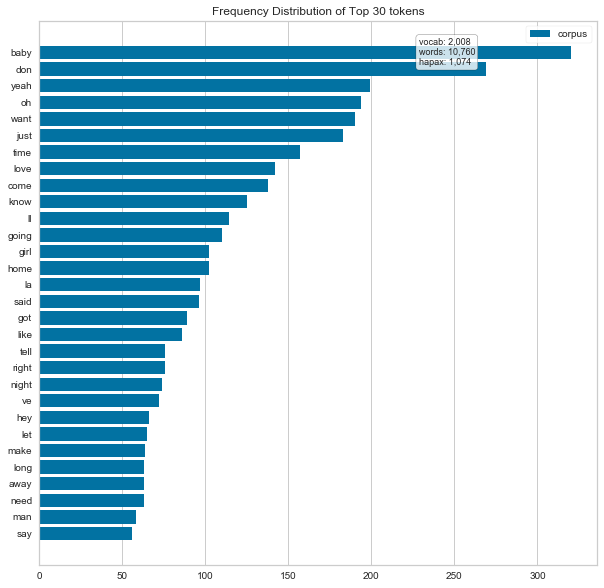

<Figure size 432x288 with 0 Axes>

In [96]:
features   = vec.get_feature_names()
docs = vec.fit_transform(corpus_rs)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
visualizer = FreqDistVisualizer(features=features,n=30)
visualizer.fit(docs)
visualizer.poof(clear_figure=True)

In [97]:
vec = CountVectorizer(stop_words='english').fit(corpus_be)
def get_top_n_words(corpus_be, n=None):
    bag_of_words = vec.transform(corpus_be)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [98]:
#Now let's view the top 30 words showing in Beatles lyrics.
common_words = get_top_n_words(corpus_be, 30)
for word, freq in common_words:
    print(word, freq)

love 402
know 246
don 217
oh 204
ll 183
yeah 166
ve 150
say 132
come 121
girl 120
like 119
got 116
need 116
time 112
want 105
good 103
let 92
long 90
man 87
day 85
tell 81
home 79
baby 77
just 75
little 72
going 69
make 67
better 66
won 64
mind 58


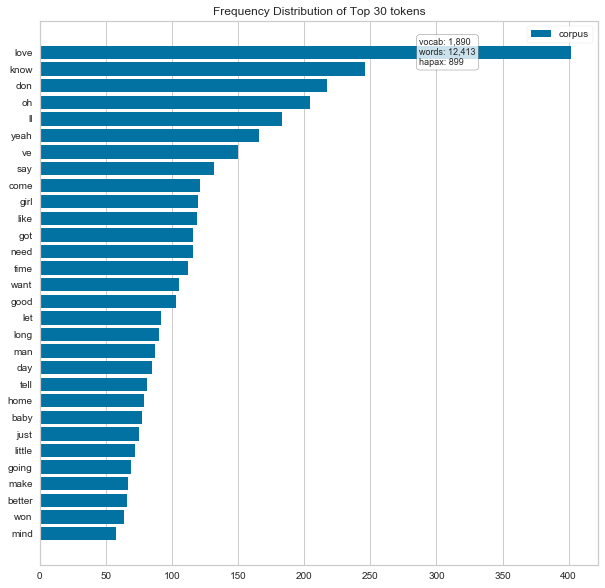

<Figure size 432x288 with 0 Axes>

In [99]:
features   = vec.get_feature_names()
docs = vec.fit_transform(corpus_be)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
visualizer = FreqDistVisualizer(features=features,n=30)
visualizer.fit(docs)
visualizer.poof(clear_figure=True)

In [100]:
corpus_be_str=' '.join(corpus_be)
corpus_rs_str=' '.join(corpus_rs)

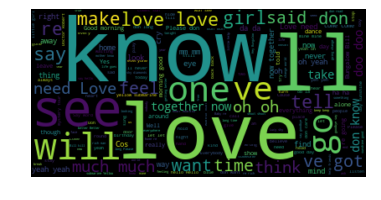

In [101]:
# Create and generate a word cloud image for most popular words in early Beatles's lyrics:
wordcloud_be = WordCloud().generate(corpus_be_str)

# Display the generated image:
plt.imshow(wordcloud_be, interpolation='bilinear')
plt.axis("off")
plt.show()

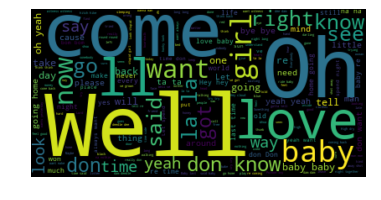

In [102]:
# Create and generate a word cloud image for most popular words in early Beatles's lyrics:
wordcloud_rs = WordCloud().generate(corpus_rs_str)

# Display the generated image:
plt.imshow(wordcloud_rs, interpolation='bilinear')
plt.axis("off")
plt.show()

In [100]:
#Define our predictors and target.
X = df_all['lyrics']
y = df_all['band']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [102]:
## Instantiate the vectorizer 

tf = TfidfVectorizer(stop_words='english')

## let's transform our dataframe and get it ready for the classification process 
X_tr = tf.fit_transform(X_train)

df_all_X_tr_text = pd.DataFrame(X_tr.toarray(), columns=tf.get_feature_names())


In [103]:
df_all_X_tr_text

,000,2000,20th,3000,31,35,50,66,909,aaaaah,...,year,years,yeh,yellow,yes,yesterday,york,young,zap,zapped
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.432685,0.0,0.000000,0.000000,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.057226,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.017130,0.000000,0.000000
6,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.028756,0.028756
7,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
8,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
9,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.167494,0.000000,0.0,0.000000,0.000000,0.000000


In [104]:
# We will fit different models and see, where we get the best score.
rfc = RandomForestClassifier(max_depth=3)
rfc.fit(df_all_X_tr_text,y_train)

C:\Users\klokl\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [105]:
# Now we need to transform the test subset and get it in the same form as train subset.
X_te = tf.transform(X_test)

df_all_X_te_text = pd.DataFrame(X_te.toarray(), columns=tf.get_feature_names())



In [106]:
print(f"mean accuracy score: {rfc.score(df_all_X_te_text, y_test)}")

mean accuracy score: 0.5972222222222222


In [107]:
lgr = LogisticRegression(penalty='l2', C=1.0)
lgr.fit(df_all_X_tr_text, y_train)

C:\Users\klokl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [108]:
print(f"mean accuracy score: {lgr.score(df_all_X_te_text, y_test)}")

mean accuracy score: 0.6388888888888888


In [109]:
adac = AdaBoostClassifier(n_estimators=3)
adac.fit(df_all_X_tr_text, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=3, random_state=None)

In [110]:
print(f"mean accuracy score: {adac.score(df_all_X_te_text, y_test)}")

mean accuracy score: 0.7083333333333334


In [111]:
neighc = KNeighborsClassifier()
neighc.fit(df_all_X_tr_text, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [112]:
print(f"mean accuracy score: {neighc.score(df_all_X_te_text, y_test)}")

mean accuracy score: 0.7083333333333334


In [113]:
svc=SVC(probability=True)
svc.fit(df_all_X_tr_text,y_train)

C:\Users\klokl\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [114]:
print(f"mean accuracy score: {svc.score(df_all_X_te_text, y_test)}")

mean accuracy score: 0.5694444444444444


In [115]:
#For the best 3 models we create Gridsearch and try to fine tune the parameters for each of it.
models = ['Logistic Regression', 'Random Forest', 'Adaboost']

clfs = [LogisticRegression(), 
        RandomForestClassifier(n_jobs=-1),
       AdaBoostClassifier()]
        
params = {models[0]: {'C': [1.0, 5.0, 10.0, 20.0, 30.0, 50.0]},
          models[1]: {'n_estimators': [80, 90, 100, 110]},
         models[2]:  {'n_estimators': [3, 5, 7, 9, 10]} }
        

In [116]:
for name, estimator in zip(models, clfs):
    print(name)
    clsf=GridSearchCV(estimator, params[name], scoring='accuracy', refit=True, n_jobs=-1, cv=5)
    clsf.fit(df_all_X_tr_text, y_train)
    print ('best params:' + str(clsf.best_params_))
    print ('best scores:' + str(clsf.best_score_))
    y_pred = clsf.predict(df_all_X_te_text)
    acc = accuracy_score(y_test, y_pred)
    
    print ('Accuracy: {:,.4%}'.format(acc))
    print (classification_report(y_test, y_pred, digits=4))
    

Logistic Regression


C:\Users\klokl\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\klokl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


best params:{'C': 5.0}
best scores:0.6203703703703703
Accuracy: 66.6667%
              precision    recall  f1-score   support

           0     0.6400    0.5161    0.5714        31
           1     0.6809    0.7805    0.7273        41

   micro avg     0.6667    0.6667    0.6667        72
   macro avg     0.6604    0.6483    0.6494        72
weighted avg     0.6633    0.6667    0.6602        72

Random Forest


C:\Users\klokl\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best params:{'n_estimators': 80}
best scores:0.6898148148148148
Accuracy: 69.4444%
              precision    recall  f1-score   support

           0     0.6800    0.5484    0.6071        31
           1     0.7021    0.8049    0.7500        41

   micro avg     0.6944    0.6944    0.6944        72
   macro avg     0.6911    0.6766    0.6786        72
weighted avg     0.6926    0.6944    0.6885        72

Adaboost
best params:{'n_estimators': 5}
best scores:0.7083333333333334
Accuracy: 73.6111%
              precision    recall  f1-score   support

           0     0.7308    0.6129    0.6667        31
           1     0.7391    0.8293    0.7816        41

   micro avg     0.7361    0.7361    0.7361        72
   macro avg     0.7349    0.7211    0.7241        72
weighted avg     0.7355    0.7361    0.7321        72



C:\Users\klokl\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [117]:
X_test

45       Ah ah listen to everybody  body  Especially ...
157       1 2 3 4      Well  she was just seventeen  ...
278      Oh  flew in from Miami Beach B O A C   Didn ...
42       Well I am a king bee Buzzing around your hiv...
193      I ve got every reason on earth to be mad  Co...
9        If you need me Why don t you call me Said if...
46       You can make it if you try  Yeah  yeah you c...
183      You know you made me cry  I see no use in wo...
77       I m going to Chicago that s the last place m...
213      We said our goodbyes  ah  the night before  ...
242      When I wake up early in the morning  Lift my...
33       My obsessions are your possessions Every pie...
116      Good evening one and all  we re all so glad ...
302      Ah  take 2  OK     You say you want a revolu...
56       A smile on your face But not in your eyes Yo...
236      There are places I ll remember  All my life ...
5        Well  baby used to stay out all night long S...
244      To lead a better life 

In [118]:
#So Adaboost got the best score. Let's predict target values for the test set.
y_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0], dtype=int64)

In [119]:
confusion_matrix(y_test, y_pred)

array([[19, 12],
       [ 7, 34]], dtype=int64)

##### With Adaboost we were able to correctly predict the author of 53 songs out of 72.

In [120]:
#Now let's create a function that will allow us to classify any string as either Beatle lyrics or Rolling Stones lyrics.
def vectorize_lyrics(lyrics_string):
    #tf = TfidfVectorizer(stop_words='english')
    X_text = tf.transform([lyrics_string])

    df_all_X_te_text = pd.DataFrame(X_text.toarray(), columns=tf.get_feature_names())
    
    
    return df_all_X_te_text

In [121]:
v_lyrics=vectorize_lyrics('yesterday')

In [122]:
def predict_artist(v_lyrics):
    y_pred = clsf.predict(v_lyrics)
    y_pred_prob=clsf.predict_proba(v_lyrics)
    return y_pred, y_pred_prob

In [123]:
def predict_band(lyrics_string):
    
    v_lyrics=vectorize_lyrics(lyrics_string)
    song_author,song_author_prob= predict_artist(v_lyrics)
    author_dict={0: 'Rolling Stones', 1: 'The Beatles'}
    print (f'This is a {author_dict[song_author[0]]} song')
    print (song_author[0])
    print(song_author_prob)

In [124]:
predict_band('''Oh yeah, I'll tell you something
I think you'll understand
When I say that something
I wanna hold your hand
I wanna hold your hand
I wanna hold your hand

Oh please, say to me
You'll let me be your man
And please, say to me
You'll let me hold your hand
You let me hold your hand
I wanna hold your hand

And when I touch you I feel happy
Inside
It's such a feeling that my love
I can't hide
I can't hide
I can't hide

Yeah, you've got that something
I think you'll understand
When I say that something
I wanna hold your hand
I wanna hold your hand
I wanna hold your hand

And when I touch you I feel happy
Inside
It's such a feeling that my love
I can't hide
I can't hide
I can't hide

Yeah, you've got that something
I think you'll understand
When I feel that something
I wanna hold your hand
I wanna hold your hand
I wanna hold your hand
I wanna hold your hand''')

This is a The Beatles song
1
[[6.42179268e-04 9.99357821e-01]]


In [125]:
#Let's save our predictor model.
import pickle
with open('finalized_classifier_3.pkl', 'wb') as abc:
  pickle.dump((tf, clsf), abc)